In [20]:
# Load Libraries
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where


In [21]:
# Generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

In [22]:
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]


In [23]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))


In [24]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])


In [25]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print("Train Accuracy : {} and Test Accuracy : {}".format(train_acc, test_acc))

Train Accuracy : 0.40400001406669617 and Test Accuracy : 0.39800000190734863


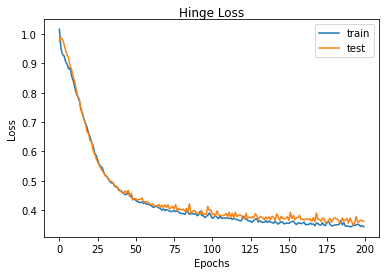

In [26]:
# plot loss during training
pyplot.title('Hinge Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.show()


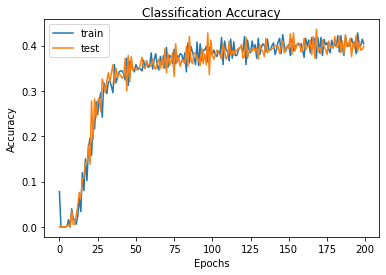

In [27]:
# plot accuracy during training
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.legend()
pyplot.show()

In [28]:
!jupyter nbconvert --to script hinge_loss_classification.ipynb

[NbConvertApp] Converting notebook hinge_loss_classification.ipynb to script
[NbConvertApp] Writing 1899 bytes to hinge_loss_classification.py
